In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import qiskit
import qtm.evolution
import qtm.state
import qtm.qcompilation
import qtm.ansatz
import qtm.constant
from qtm.evolution import environment, mutate, selection, crossover, utils
import matplotlib.pyplot as plt
# %load_ext autoreload
# %autoreload 2


In [2]:
num_qubits = 2

if num_qubits == 2:
    qc_haar = qtm.state.create_specific_state(num_qubits,
    [ 0.73042448, -0.30956267, -0.45658101,  0.40272176])

def compilation_fitness_w(qc: qiskit.QuantumCircuit, num_steps=5):
    """3 qubits => depth 8

    Args:
        qc (qiskit.QuantumCircuit): _description_
        num_steps (int, optional): _description_. Defaults to 5.

    Returns:
        _type_: _description_
    """
    compiler = qtm.qcompilation.QuantumCompilation(
        u=qc,
        vdagger=qtm.state.create_w_state(num_qubits).inverse(),
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, verbose=0)
    return np.average(compiler.loss_values)

def compilation_fitness_ghz(qc: qiskit.QuantumCircuit, num_steps=5):
    compiler = qtm.qcompilation.QuantumCompilation(
        u=qc,
        vdagger=qtm.state.create_ghz_state(num_qubits).inverse(),
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, verbose=0)
    return np.average(compiler.loss_values)

def compilation_fitness(qc: qiskit.QuantumCircuit, num_steps=5):
    compiler = qtm.qcompilation.QuantumCompilation(
        u=qc,
        vdagger=qc_haar.inverse(),
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, verbose=0)
    return np.average(compiler.loss_values)


def compilation_threshold(fitness_value):
    if fitness_value < 0.1:
        return True
    return False


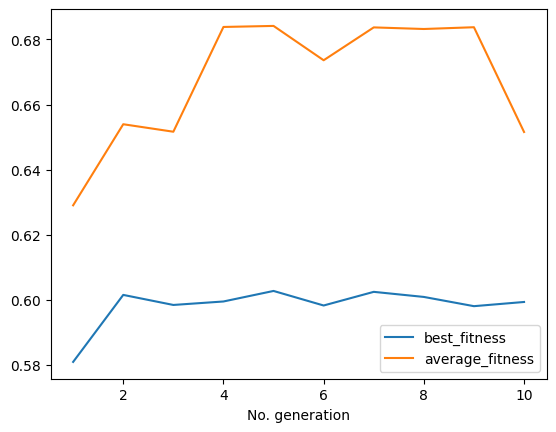

In [5]:
env2 = environment.EEnvironment("../experiments/evolution/ga_2qubits_compilation_fitness_ghz_2023-10-30.envobj")
env2.plot(['best_fitness','average_fitness'])

In [3]:
params = {'depth': 4,
          'num_circuit': 4,  # Must mod 8 = 0
          'num_generation': 20,
          'num_qubits': num_qubits,
          'threshold': compilation_threshold,
          'prob_mutate': 0.1}

env = environment.EEnvironment(
    params,
    fitness_func=compilation_fitness_ghz,
    selection_func=selection.elitist_selection,
    crossover_func=crossover.onepoint_crossover,
    mutate_func=mutate.bitflip_mutate,
    pool=qtm.constant.operations,
    file_name='../experiments/evolution/'
)

env.evol()

Step:   0%|          | 0/20 [00:00<?, ?it/s]

Initialize population ...
Start evol progress ...
Evol at generation 0
Fitness 0.4549214463817918, Strengh 3.373493611439797


Process SpawnProcess-2:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/concurrent/futures/process.py", line 240, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'compilation_fitness_ghz' on <module '__main__' (built-in)>
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
 

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.